In [1]:
import numpy as np
import keras
import matplotlib.pyplot as plt
import pandas as pd
plt.rcParams["figure.figsize"] = [8, 5.3]

### Ejercicio: MNIST con ConvNets

(28, 28)
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 2

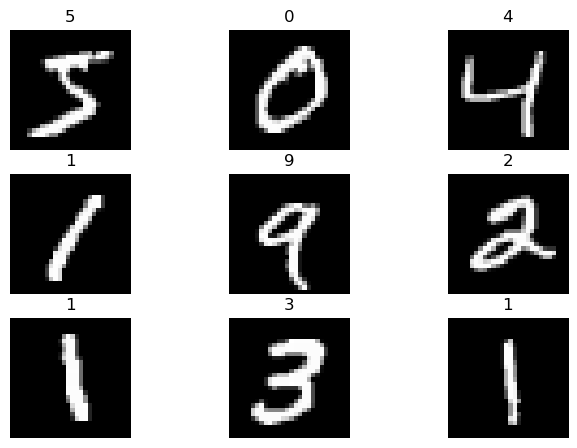

In [2]:
mnist = keras.datasets.mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

fig = plt.figure()
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(X_train[i], cmap='gray')
    plt.title(y_train[i])
    plt.axis('off')

# images are 28 x 28 pixels represented as a matrix. Values of this matrix go from 0 to 255
print(X_train[0].shape)
print(X_train[0])

[<Conv2D name=conv2d, built=False>, <BatchNormalization name=batch_normalization, built=False>, <Activation name=activation, built=True>, <MaxPooling2D name=max_pooling2d, built=True>, <Dropout name=dropout, built=True>, <Conv2D name=conv2d_1, built=False>, <BatchNormalization name=batch_normalization_1, built=False>, <Activation name=activation_1, built=True>, <MaxPooling2D name=max_pooling2d_1, built=True>, <Dropout name=dropout_1, built=True>, <Conv2D name=conv2d_2, built=False>, <BatchNormalization name=batch_normalization_2, built=False>, <Activation name=activation_2, built=True>, <MaxPooling2D name=max_pooling2d_2, built=True>, <Dropout name=dropout_2, built=True>, <Flatten name=flatten, built=False>, <Dense name=dense, built=False>, <BatchNormalization name=batch_normalization_3, built=False>, <Activation name=activation_3, built=True>, <Dropout name=dropout_3, built=True>, <Dense name=dense_1, built=False>]
<Sequential name=sequential, built=True>
Epoch 1/2
469/469 ━━━━━━━━━━━

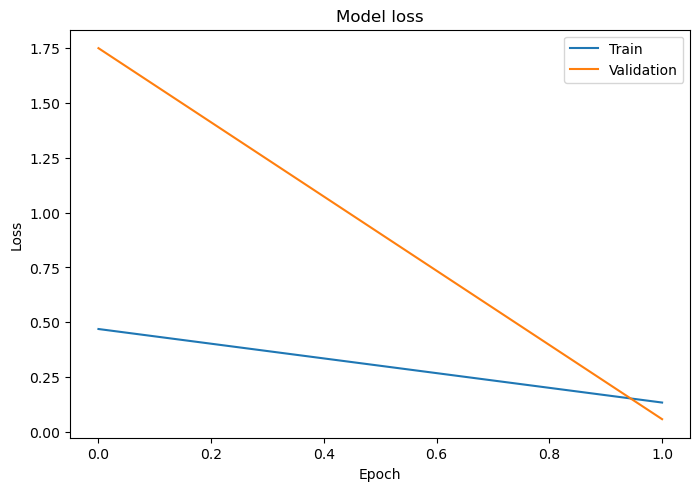

In [3]:
from keras import models, layers

# A helper function
def build_list_cnn_layers():
    return [
        # First Convolutional Block
        layers.Conv2D(32, (3, 3), padding='same'),
        layers.BatchNormalization(),
        layers.Activation('relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Dropout(0.25),
        
        # Second Convolutional Block
        layers.Conv2D(64, (3, 3), padding='same'),
        layers.BatchNormalization(),
        layers.Activation('relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Dropout(0.25),
        
        # Third Convolutional Block
        layers.Conv2D(64, (3, 3), padding='same'),
        layers.BatchNormalization(),
        layers.Activation('relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Dropout(0.25),
        
        # Classification Head
        layers.Flatten(),
        layers.Dense(128),
        layers.BatchNormalization(),
        layers.Activation('relu'),
        layers.Dropout(0.5),
        layers.Dense(10, activation='softmax')
    ]


def build_model(layers_list):
    model = keras.Sequential(
        [layers.Input(shape=(28, 28, 1))] + layers_list
    )
    return model


(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Recall the importance of normalizing the data
X_train = X_train / 255.0
X_test = X_test / 255.0

# Let's subset the data for faster training. Don't do this on real data!
# X_train = X_train[:10000]
# y_train = y_train[:10000]


layers_list = build_list_cnn_layers()
print(layers_list)
model = build_model(layers_list)
print(model)
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(
        X_train,
        y_train,
        batch_size=128,
        # !!!!!!!!!!!!!!! Adjust the number of epochs !!!!!!!!!!!!!!!
        # !!!!!!!!!!!!!!! This is just for a quick demo !!!!!!!!!!!!!!!
        epochs=2,
        validation_data=(X_test, y_test)
    )
   
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

### Ejemplo: *Image augmentation* 

*Image augmentation* se puede implementar como capas de una red neuronal en keras. En el siguiente fragmento, construimos una red que solo hace augmentation para visualizar cómo funciona. Es **fundamental visualizar data augmentation** para asegurarnos que los nuevos datos tienen sentido. Por ejemplo, no sería lógico permitir rotaciones de muchos grados, ¡ya que los 6 se podrían transformar en 9!

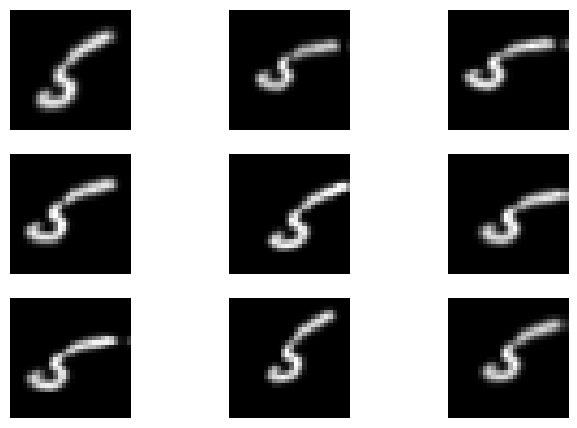

In [13]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Recall the importance of normalizing the data
X_train = X_train / 255
X_test = X_test / 255


def build_augmentation_layers_list():
    # Data Augmentation
    return [
        # !!!!!!!!!!! Adjust the following rotation !!!!!!!
        layers.RandomRotation(factor=0.05),
        layers.RandomTranslation(height_factor=0.1, width_factor=0.1),
        layers.RandomZoom(0.1),
    ]
        
    
augmentation_model = build_model(build_augmentation_layers_list())

# plot a few images to get the intuition of the data augmentation
for i in range(9):
    plt.subplot(3, 3, i+1)
    img_batch = X_train[11].reshape(1, 28, 28, 1) # Add batch dimension for keras
    augmented_image = augmentation_model(img_batch, training=True) 
    plt.imshow(augmented_image[0].cpu().numpy(), cmap='gray')
    plt.axis('off')


Después de validar las transformaciones, podemos entrenar una red neuronal que use *data augmentation* durante entrenamiento. Para realizar predicciones, keras desactiva automáticamente las transformaciones.

Epoch 1/2
469/469 ━━━━━━━━━━━━━━━━━━━━ 39s 75ms/step - accuracy: 0.5961 - loss: 1.2405 - val_accuracy: 0.9637 - val_loss: 0.1797
Epoch 2/2
469/469 ━━━━━━━━━━━━━━━━━━━━ 35s 74ms/step - accuracy: 0.9217 - loss: 0.2566 - val_accuracy: 0.9845 - val_loss: 0.0452


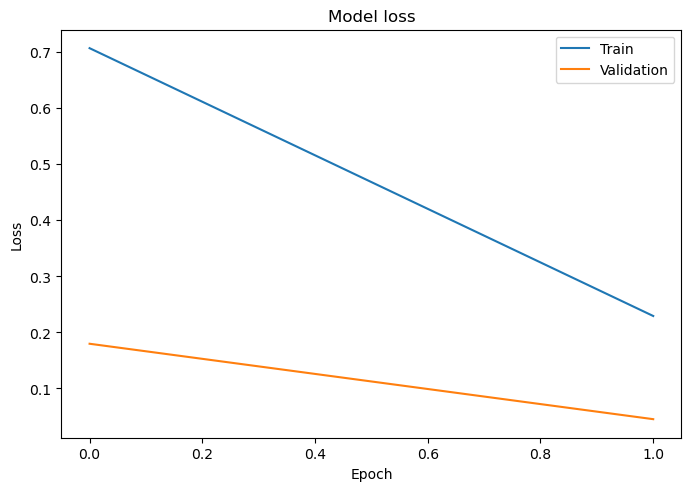

In [14]:

(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Recall the importance of normalizing the data
X_train = X_train / 255
X_test = X_test / 255

# Let's subset the data for faster training. Don't do this on real data!
# X_train = X_train[:10000]
# y_train = y_train[:10000]


# Now we build the model with the augmentation layers
layers_list = build_augmentation_layers_list() + build_list_cnn_layers()
model = build_model(layers_list)
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(
        X_train,
        y_train,
        batch_size=128,
        # !!!!!!!!!!!!!!! Adjust the number of epochs !!!!!!!!!!!!!!!
        # !!!!!!!!!!!!!!! This is just for a quick demo !!!!!!!!!!!!!!!
        epochs=2,
        validation_data=(X_test, y_test)
    )
   
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

### Ejemplo: Transfer Learning

En este ejemplo, usaremos un nuevo dataset con imágenes en color: CIFAR10.

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 8s 0us/step
[[3]
 [8]
 [8]
 ...
 [5]
 [1]
 [7]]


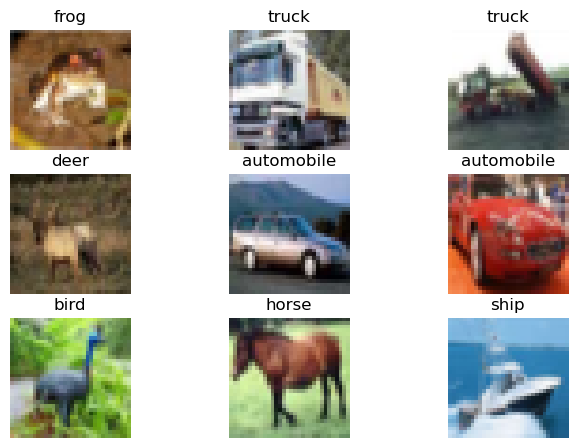

In [15]:
from keras.datasets import cifar10

def load_cifar10():
    # Load CIFAR-10
    (x_train, y_train), (x_test, y_test) = cifar10.load_data()
    
    # Normalize pixel values
    x_train = x_train.astype('float32') / 255
    x_test = x_test.astype('float32') / 255
    
    # CIFAR-10 class names for reference
    class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
                  'dog', 'frog', 'horse', 'ship', 'truck']
    
    return (x_train, y_train), (x_test, y_test), class_names


(X_train, y_train), (X_test, y_test), class_names = load_cifar10()
print(y_test)

for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(X_train[i])
    plt.title(class_names[y_train[i][0]])
    plt.axis('off')

CIFAR10 es mucho más complejo que MNIST, por lo que usaremos una aproximación de transfer learning. Como modelo base, utilizaremos VGG-16, desarrollado por el Visual Geometry Group de Oxford. Hemos elegido este modelo por su eficiencia computacional y su simplicidad arquitectónica, no porque represente el estado del arte actual. De hecho, su nombre indica que solo tiene 16 capas, una profundidad modesta comparada con las arquitecturas modernas que pueden tener cientos o miles de capas. Además, VGG-16 es un modelo especializado en clasificación de imágenes, a diferencia de los foundation models actuales que son capaces de realizar múltiples tareas y comprender relaciones entre diferentes modalidades de datos (texto, imagen, audio, etc.).

In [ ]:
# Modelos ya entrenados.x
from keras.applications import VGG16 

def create_cifar10_model():
    # Load VGG16 with pre-trained weights, exclude top layer
    base_model = VGG16(
        # The weights from this model have been trained on a different dataset named ImageNet
        weights='imagenet',
        include_top=False,
        input_shape=(32, 32, 3)
    )
    
    # Freeze all layers except the last two conv blocks
    for layer in base_model.layers[:-4]:  # Freeze all except last 2 conv blocks # Las últimas 4 si las ajustamos o las dejamos como que son entrenables.
        layer.trainable = False
        
    # Print trainable status
    print("\nTrainable layers:")
    for layer in base_model.layers:
        print(f"{layer.name}: {layer.trainable}")
    
    # Create new model
    model = keras.Sequential([
        # Data augmentation layers
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.1),
        
        # Base model
        base_model,
        
        # Classification head
        layers.Flatten(),
        layers.Dense(512),
        layers.BatchNormalization(),
        layers.Activation('relu'),
        layers.Dropout(0.5),
        layers.Dense(10, activation='softmax')
    ])
    
    return model

In [16]:
(x_train, y_train), (x_test, y_test), class_names = load_cifar10()
    
# Create model
model = create_cifar10_model()

# Compile with a smaller learning rate for fine tuning
model.compile(
    # ¡¡¡¡¡¡¡¡¡ Note the small learning rate !!!!!!
    optimizer=keras.optimizers.Adam(learning_rate=1e-4),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Train model
history = model.fit(
    x_train,
    y_train,
    batch_size=32,  # Smaller batch size for better generalization
    # !!!!!!!!!!!!!!! Adjust the number of epochs !!!!!!!!!!!!!!!
    # !!!!!!!!!!!!!!! This is just for a quick demo !!!!!!!!!!!!!!!
    epochs=2,
    validation_data=(x_test, y_test)
)

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 8s 0us/step

Trainable layers:
input_layer_7: False
block1_conv1: False
block1_conv2: False
block1_pool: False
block2_conv1: False
block2_conv2: False
block2_pool: False
block3_conv1: False
block3_conv2: False
block3_conv3: False
block3_pool: False
block4_conv1: False
block4_conv2: False
block4_conv3: False
block4_pool: False
block5_conv1: True
block5_conv2: True
block5_conv3: True
block5_pool: True
Epoch 1/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 203s 130ms/step - accuracy: 0.4510 - loss: 1.6383 - val_accuracy: 0.6381 - val_loss: 1.0571
Epoch 2/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 200s 128ms/step - accuracy: 0.6056 - loss: 1.1460 - val_accuracy: 0.6680 - val_loss: 0.9935
Epoch 3/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 197s 126ms/step - accuracy: 0.6380 - loss: 1.0480 - val_accuracy: 0.6974 - val_loss: 0.8737
Epoch 4/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 193s 124ms/step - accuracy: 0.6663 - loss: 0.9627 - val_accuracy: 0.7099 - val_loss: 0.8439
Epoch 5/20
  55/1563 ━

### Ejercicios sobre ConvNets Básicas
1. Modifica el ejemplo de MNIST para trabajar con Fashion-MNIST. Compara el rendimiento usando diferentes configuraciones de capas convolucionales.
2. Implementa el mismo modelo con el dataset EMNIST (letras) y analiza por qué algunas letras son más difíciles de clasificar que otras.

### Ejercicios sobre Augmentation
1. Aplica técnicas de data augmentation al dataset CIFAR-10 usando solo transformaciones geométricas (rotación, zoom, flip). Compara con el rendimiento usando también transformaciones de color.
2. Implementa augmentation en el Stanford Dogs dataset y visualiza cómo afectan diferentes tipos de augmentation a las imágenes de perros.

### Ejercicios sobre Transfer Learning
1. Usa ResNet50 en lugar de VGG16 para CIFAR10. Experimenta descongelando diferentes números de capas y compara resultados.
2. Aplica transfer learning al Oxford Flowers dataset usando MobileNetV2 como base. Compara el rendimiento entre congelar todas las capas vs descongelar los últimos bloques.